In [1]:
import numpy as np
import pencil as pc
import matplotlib.pyplot as plt

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc


In [2]:
plt.rcParams.update({'font.size': 12})
plt.rcParams['text.usetex'] = True

In [3]:
xya = pc.read.aver(plane_list='xy')

In [4]:
grid = pc.read.grid()
z = grid.z
z.shape

reading grid data from processor 27 of 128 ...
reading grid data from processor 98 of 128 ...
reading grid data from processor 54 of 128 ...
reading grid data from processor 39 of 128 ...
reading grid data from processor 57 of 128 ...
reading grid data from processor 86 of 128 ...
reading grid data from processor 19 of 128 ...
reading grid data from processor 119 of 128 ...
reading grid data from processor 92 of 128 ...
reading grid data from processor 71 of 128 ...
reading grid data from processor 70 of 128 ...
reading grid data from processor 56 of 128 ...
reading grid data from processor 103 of 128 ...
reading grid data from processor 30 of 128 ...
reading grid data from processor 112 of 128 ...
reading grid data from processor 40 of 128 ...
reading grid data from processor 126 of 128 ...
reading grid data from processor 60 of 128 ...
reading grid data from processor 89 of 128 ...
reading grid data from processor 62 of 128 ...
reading grid data from processor 93 of 128 ...
reading g

(262,)

In [5]:
ts = pc.read.ts()

Read 36253 lines.


In [6]:
from scipy.optimize import curve_fit
def urms(ti: int, tj: int):
        """
        Calculate the average temperature of a layer
        from time_series.dat
        """
        def g(t, a, b):
            return a*t+b
        popt, _ = curve_fit(g, ts.t[ti:tj], ts.urms[ti:tj])
        u_fit = g(ts.t[ti:tj], *popt)
        return round(np.average(u_fit),5)

In [7]:
u_rms = urms(100,1900)
u_rms

0.12003

In [8]:
ts.urms[400:450]

array([0.1194, 0.1194, 0.1191, 0.1195, 0.1188, 0.1195, 0.1199, 0.1199,
       0.1197, 0.1201, 0.1207, 0.1211, 0.1213, 0.1211, 0.1214, 0.1211,
       0.1214, 0.1214, 0.1207, 0.1205, 0.1205, 0.12  , 0.1199, 0.1198,
       0.1199, 0.1204, 0.1205, 0.1211, 0.1208, 0.1208, 0.1212, 0.1212,
       0.1209, 0.121 , 0.1215, 0.1214, 0.1216, 0.1215, 0.1214, 0.1213,
       0.1214, 0.1211, 0.1208, 0.121 , 0.1213, 0.1208, 0.1207, 0.1207,
       0.1203, 0.1203])

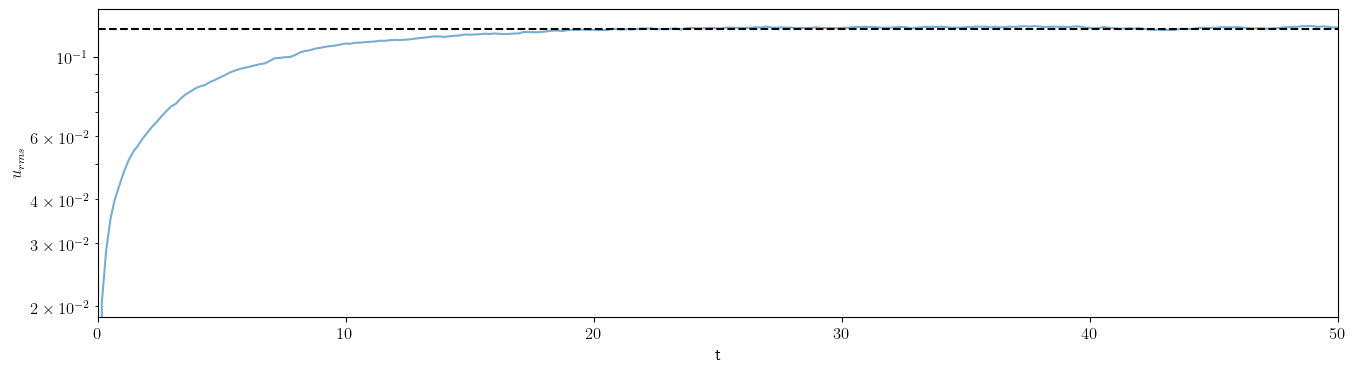

In [9]:
fig = plt.figure(figsize=(16,4))
plt.plot(ts.t, ts.urms, alpha=0.6)
plt.axhline(y=u_rms, c='k', ls='--')
# plt.plot(t_fit, u_fit, '--r')
plt.yscale('log')
plt.xlim(0,50)
plt.xlabel("t")
plt.ylabel(r"$u_{rms}$")
plt.show()

In [10]:
bxmz=xya.xy.bxmz
bx2mz=xya.xy.bx2mz
bymz=xya.xy.bymz
by2mz=xya.xy.by2mz
by = [bxmz, bymz]
by2 = [bx2mz, by2mz]
by2sqr = np.sqrt(by2)

In [11]:
np.shape(np.sqrt(bx2mz))

(18131, 256)

In [12]:
np.shape(by)

(2, 18131, 256)

In [13]:
np.min(by[1]/by2sqr[1]), np.min(by[0]/by2sqr[0])

(-0.33670664, -0.5000674)

In [14]:
np.min(by/by2sqr), np.max(by/by2sqr)

(-0.5000674, 0.5192889)

In [15]:
np.max(by[1]/by2sqr[1]), np.max(by[0]/by2sqr[0])

(0.5192889, 0.396923)

In [16]:
# fig, axs = plt.subplots(2,1, figsize=(14,8), sharex=True, constrained_layout = True)

# [X, Y] = np.meshgrid(xya.t, z[3:-3])
# # textstr = [r'$\langle B_x \rangle _{xy}/\sqrt{\langle B_x^2 \rangle _{xy}}$', 
# #            r'$\langle B_y \rangle _{xy}/\sqrt{\langle B_y^2 \rangle _{xy}}$']
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# for i in range(len(axs.flat)):
#     ims = axs[i].contourf(X, Y, np.transpose(by[i]/by2sqr[i]), 100, cmap='plasma', vmin=np.min(by/by2sqr), vmax=np.max(by/by2sqr))
#     # axs[i].text(0.05, 0.95, textstr[i], transform=axs[i].transAxes, fontsize=12, verticalalignment='top', bbox=props)
# #axs[0].contour(np.transpose(bxmz),50,cmap='bwr')
# axs[0].set_xlabel(r'$t$')
# axs[0].set_ylabel(r'$z$')
# axs[0].set_title(r'$\langle B_x \rangle _{xy}/\sqrt{\langle B_{\vphantom{y}x}^2 \rangle _{xy}}$')
# axs[0].set_xlim(0,)

# #axs[1].contour(np.transpose(bymz),50,cmap='bwr')
# axs[1].set_xlabel(r'$t$')
# axs[1].set_ylabel(r'$z$')
# axs[1].set_title(r'$\langle B_y \rangle _{xy}/\sqrt{\langle B_y^2 \rangle _{xy}}$')
# axs[1].set_xlim(0,)



# fig.colorbar(ims, ax=axs.ravel().tolist())
# # cax = plt.axes([1.015, 0.11, 0.03, 0.8])
# # plt.colorbar(ims, cax=cax)


# #plt.tight_layout()
# # fig.tight_layout()

# #plt.savefig('ave.jpg')
# plt.show()

In [17]:
# vmin, vmax

In [18]:
# round(vmin,1), round(vmax,1)

In [19]:
np.max(by/by2sqr)

0.5192889

/tmp/ipykernel_862266/818083587.py:32: UserWarning:

The figure layout has changed to tight



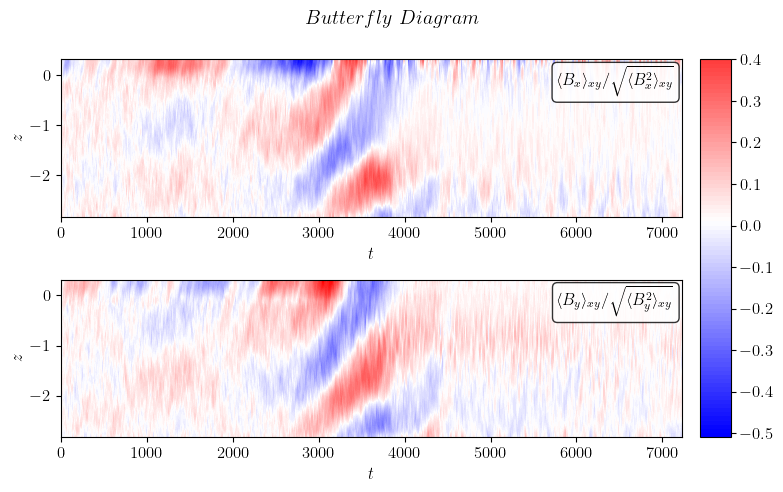

In [20]:
left, width = .488, .5
bottom, height = .45, .5
right = left + width
top = bottom + height

gs_kw = dict(width_ratios=[2, 0.1], height_ratios=[1, 1])
fig, axs = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              gridspec_kw=gs_kw, figsize=(8,5),
                              layout="constrained")

title = [r'$\langle B_x \rangle _{xy}/\sqrt{\langle B_{\vphantom{y}x}^2 \rangle _{xy}}$', r'$\langle B_y \rangle _{xy}/\sqrt{\langle B_y^2 \rangle _{xy}}$']
props = dict(boxstyle='round', facecolor='white', alpha=0.8)

pos = ['upper left', 'lower left']

[X, Y] = np.meshgrid(xya.t, z[3:-3])

vmax=np.max(by/by2sqr)
vmin=np.min(by/by2sqr)


for i in range(len(pos)):
    axs[pos[i]].contourf(X, Y, np.transpose(by[i]/by2sqr[i]), 100, cmap='bwr', vmin=vmin, vmax=vmax)
    # axs[pos[i]].set_title(title[i])
    axs[pos[i]].text(right, top, title[i], transform=axs[pos[i]].transAxes, fontsize=12, horizontalalignment='right', verticalalignment='top', bbox=props)
    axs[pos[i]].set_xlabel(r'$t$')
    axs[pos[i]].set_ylabel(r'$z$')
    
ims = axs[pos[0]].contourf(X, Y, np.transpose(by[0]/by2sqr[0]), 100, cmap='bwr', vmin=vmin, vmax=vmax)

plt.tight_layout()
plt.suptitle(r'$Butterfly$ $Diagram$')
plt.subplots_adjust(top=0.92)
cbar = fig.colorbar(ims, cax=axs['right'])#, ticks=[-.3, -.2, -.1, 0, .1, .2, .3])
# cbar.set_ticks([-.3, -.2, -.1, 0, .1, .2, .3])
#ticks = np.arange(round(vmin,2), round(vmax,2), 0.1)
#cbar.set_ticks(ticks)
fig.tight_layout()
# plt.savefig('plots/butterfly.pdf',bbox_inches='tight')
plt.show()

In [21]:
ts = pc.read.ts()

Read 31824 lines.


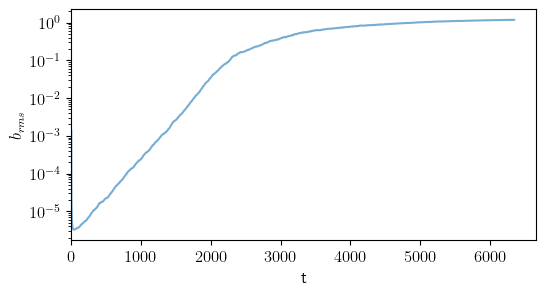

In [22]:
plt.figure(figsize=(6,3))
plt.semilogy(ts.t, ts.brms, alpha=0.6)
plt.yscale('log')
plt.xlim(0,)
plt.xlabel("t")
plt.ylabel(r"$b_{rms}$")
plt.show()

In [23]:
bx2mz.shape

(15915, 256)

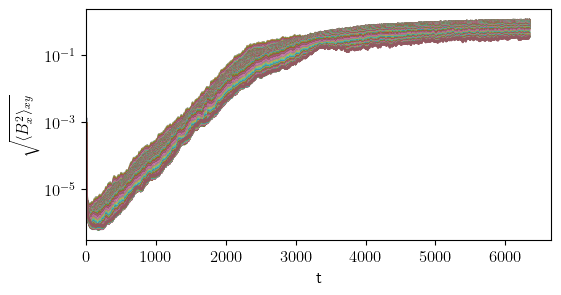

In [24]:
plt.figure(figsize=(6,3))
plt.semilogy(xya.t, np.sqrt(bx2mz), alpha=0.6)
plt.yscale('log')
plt.xlim(0,)
plt.xlabel("t")
plt.ylabel(r"$\sqrt{\langle B_{\vphantom{y}x}^2 \rangle _{xy}}$")
plt.show()

In [25]:
ts = pc.read.ts()

Read 31824 lines.


In [26]:
ims.colorbar

In [27]:
x = np.array([0,1,2,3,4])
np.tile(x, (3,1))

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

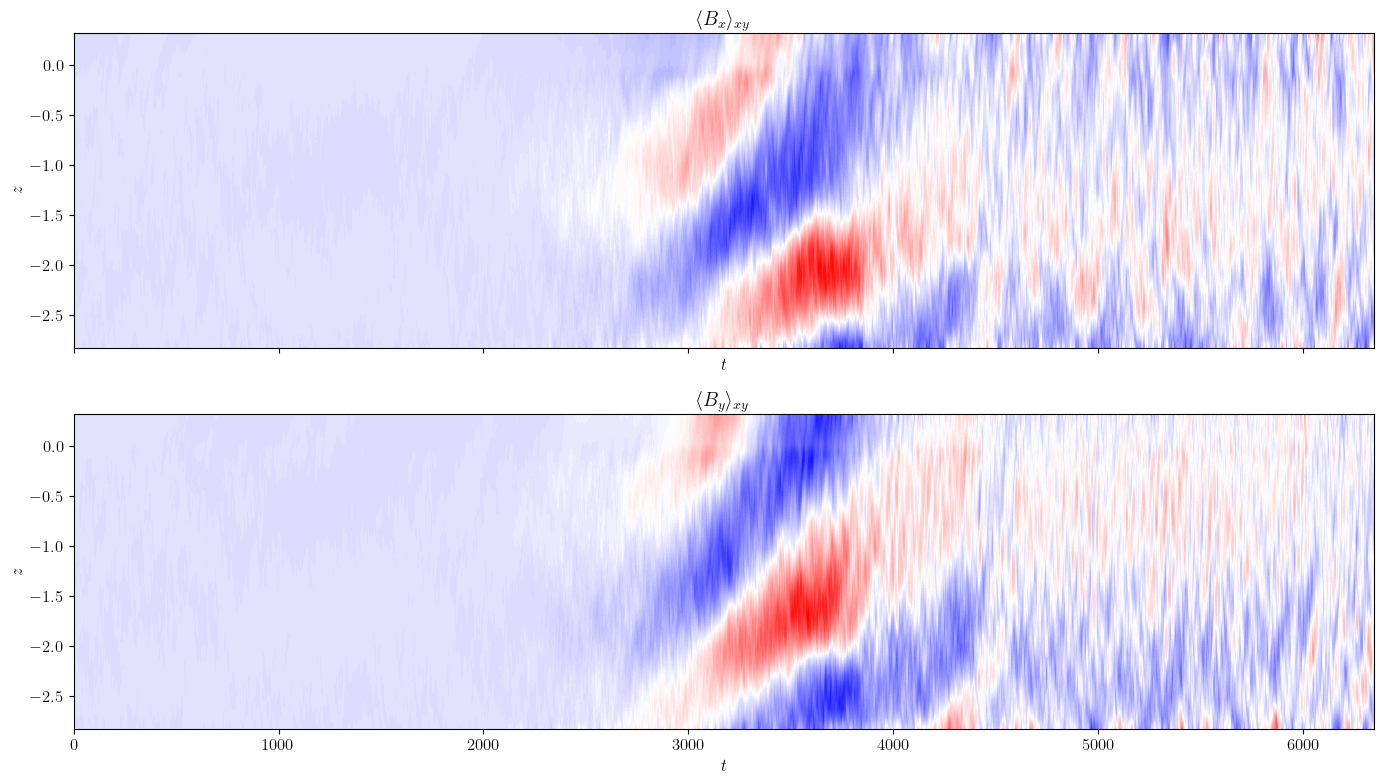

In [28]:
fig, axs = plt.subplots(2,1, figsize=(14,8), sharex=True)

[X, Y] = np.meshgrid(xya.t, z[3:-3])
for i in range(len(axs.flat)):
    ims = axs[i].contourf(X, Y, np.transpose(by[i]),100,cmap='bwr', vmin=np.min(by), vmax=np.max(by))

#axs[0].contour(np.transpose(bxmz),50,cmap='bwr')
axs[0].set_xlabel(r'$t$')
axs[0].set_ylabel(r'$z$')
axs[0].set_title(r'$\langle B_x \rangle _{xy}$')
axs[0].set_xlim(0,)

#axs[1].contour(np.transpose(bymz),50,cmap='bwr')
axs[1].set_xlabel(r'$t$')
axs[1].set_ylabel(r'$z$')
axs[1].set_title(r'$\langle B_y \rangle _{xy}$')
axs[1].set_xlim(0,)

#cbar_ax = fig.add_axes([1.05, 0.15, 0.05, 0.7])
# cax = axs.inset_axes([0.3, 0.07, 0.4, 0.04])
# fig.colorbar(ims, cax=axs)
plt.tight_layout()
#plt.savefig('ave.jpg')
plt.show()

In [29]:
ts = pc.read.ts()

Read 31824 lines.


In [30]:
xya.t[-1], ts.t[-1]

(6346.66, 6347.057)

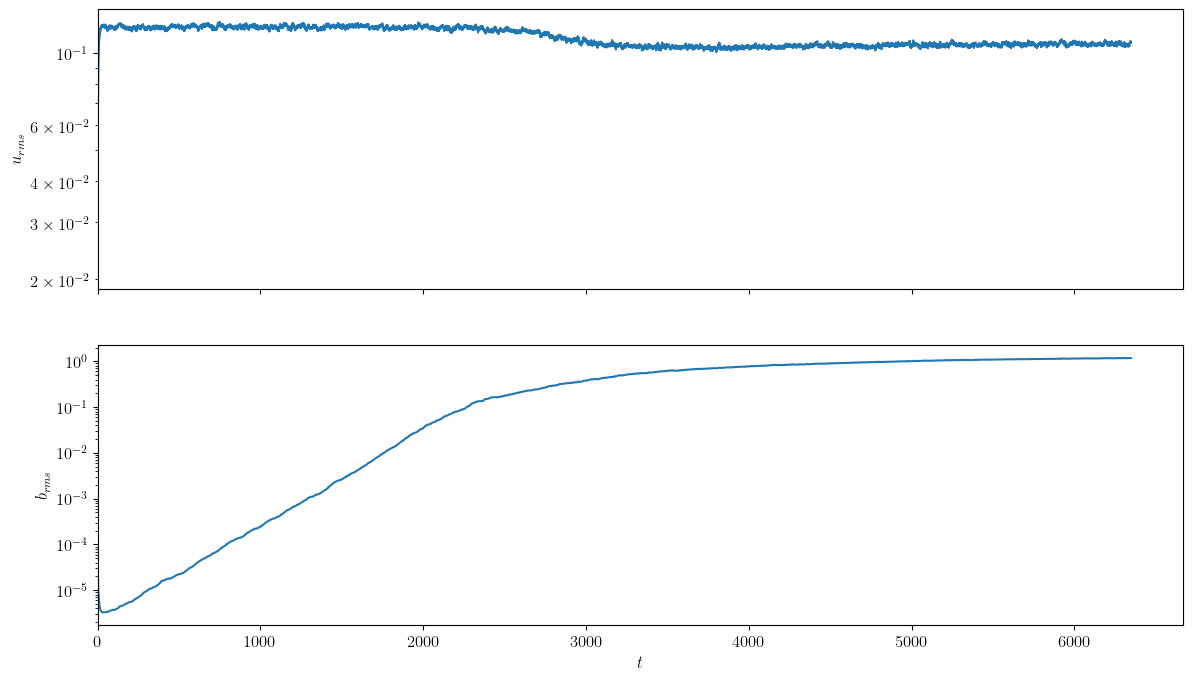

In [31]:
fig, axes = plt.subplots(2,1, sharex=True, figsize=(14,8))

axes[0].semilogy(ts.t, ts.urms)
axes[1].semilogy(ts.t, ts.brms)

axes[0].set_xlim(0,)
axes[1].set_xlim(0,)

axes[0].set_ylabel(r"$u_{rms}$")
axes[1].set_ylabel(r"$b_{rms}$")

plt.xlabel(r"$t$")
plt.show()

In [32]:
bxmz.shape

(15915, 256)

In [33]:
t = ts.t
t.shape, t[-1]

((31824,), 6347.057)

In [34]:
res = [ts.t[i] for i in range(len(ts.t)) if i % 2 == 0]

In [35]:
res[-1]

6346.86

In [36]:
len(res)

15912

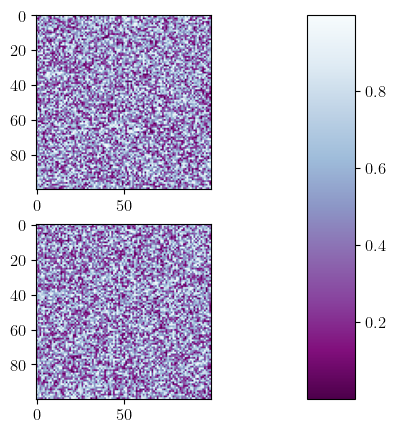

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.subplot(211)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)
plt.subplot(212)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.75, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()


In [38]:
vars = []
for i in 

SyntaxError: invalid syntax (753948947.py, line 2)

In [ ]:
# plt.rcParams['axes.titley'] = 0.95    # y is in axes-relative coordinates.
# plt.rcParams['axes.titlepad'] = -14  # pad is in points...
# ax = axs[1]
# ax.set_xlabel('X-label')
# ax.set_title(r'$\langle B_x \rangle _{xy}/\sqrt{\langle B_x^2 \rangle _{xy}}$')

# axs[0].text(0.05, 0.95, textstr, transform=axs[0].transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)


# fig.tight_layout(pad=.3)

#cbar_ax = fig.add_axes([1.05, 0.15, 0.05, 0.7])
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=1.1, 
#                     top=3.9, 
#                     wspace=0.2, 
#                     hspace=0.6)

In [ ]:
def f(cs2cool, cool):
    cool2 = (cs2cool-10)*cool/9
    return cool2

In [ ]:
f(15,0.45)

0.25

In [ ]:
def annotate_axes(ax, text, fontsize=18):
    ax.text(0.5, 0.5, text, transform=ax.transAxes,
            ha="center", va="center", fontsize=fontsize, color="darkgrey")

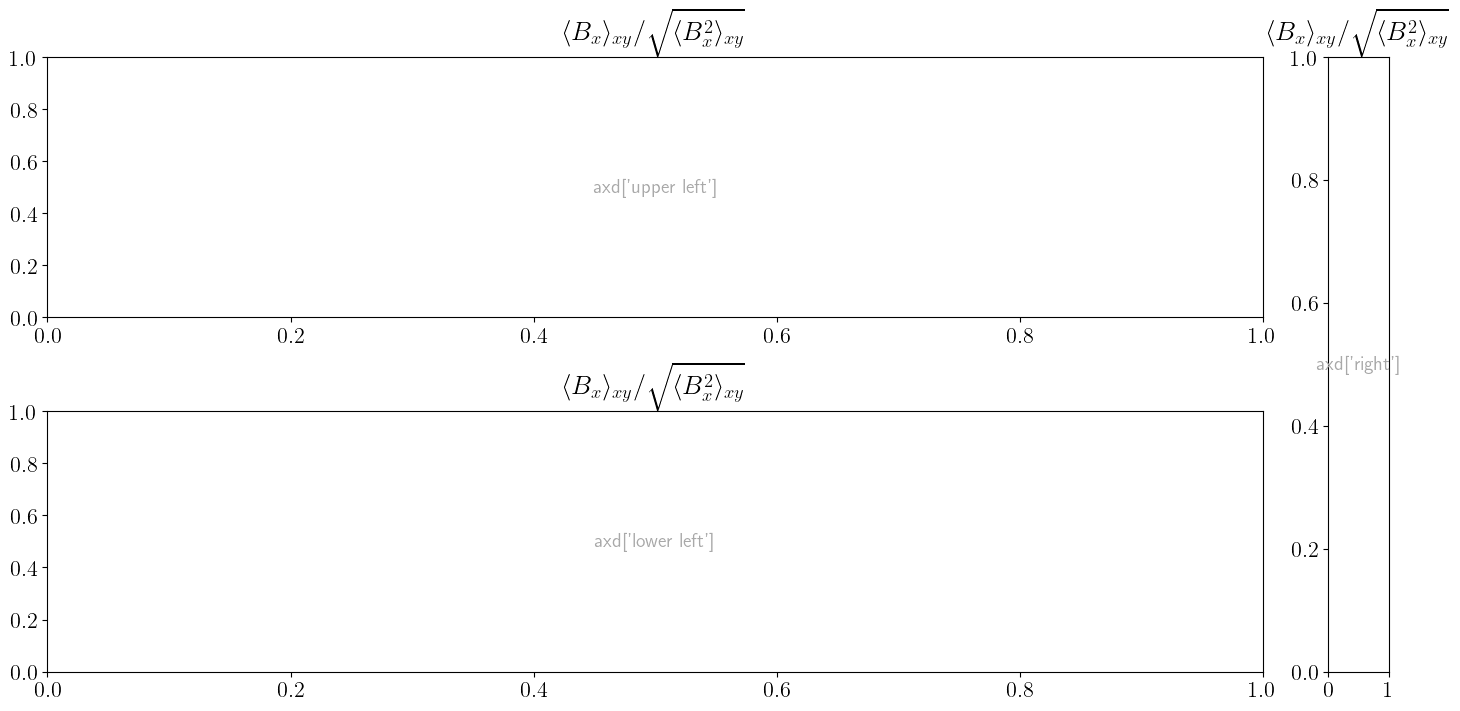

In [ ]:
gs_kw = dict(width_ratios=[2, 0.1], height_ratios=[1, 1])
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              gridspec_kw=gs_kw, figsize=(14,7),
                              layout="constrained")
# title = {'upper left':r'$\langle B_x \rangle _{xy}/\sqrt{\langle B_x^2 \rangle _{xy}}$', 'right':np.NaN, 'lower left':r'$\langle B_y \rangle _{xy}/\sqrt{\langle B_y^2 \rangle _{xy}}$'}
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]', fontsize=14)
    # ax.set_title(title[k])
    ax.set_title(r'$\langle B_x \rangle _{xy}/\sqrt{\langle B_{\vphantom{y}x}^2 \rangle _{xy}}$')

# pos = ['upper left', 'lower left']
# [X, Y] = np.meshgrid(xya.t, z[3:-3])

# # axd[pos[0]].contourf(X, Y, np.transpose(by[0]/by2sqr[0]), 100, cmap='plasma', vmin=np.min(by/by2sqr), vmax=np.max(by/by2sqr))
# axd[pos[0]].set_title(title[0])
# # axd[pos[1]].contourf(X, Y, np.transpose(by[1]/by2sqr[1]), 100, cmap='plasma', vmin=np.min(by/by2sqr), vmax=np.max(by/by2sqr))
# axd[pos[1]].set_title(title[1])

    # print(k)
# fig.suptitle('plt.subplot_mosaic()')

In [ ]:
axd.items()

dict_items([('upper left', <Axes: label='upper left', title={'center': '$\\langle B_x \\rangle _{xy}/\\sqrt{\\langle B_x^2 \\rangle _{xy}}$'}>), ('right', <Axes: label='right', title={'center': '$\\langle B_x \\rangle _{xy}/\\sqrt{\\langle B_x^2 \\rangle _{xy}}$'}>), ('lower left', <Axes: label='lower left', title={'center': '$\\langle B_x \\rangle _{xy}/\\sqrt{\\langle B_x^2 \\rangle _{xy}}$'}>)])

Text(0.5, 1.0, '$\\langle B_x \\rangle _{xy}/\\sqrt{\\langle B_x^2 \\rangle _{xy}}$')

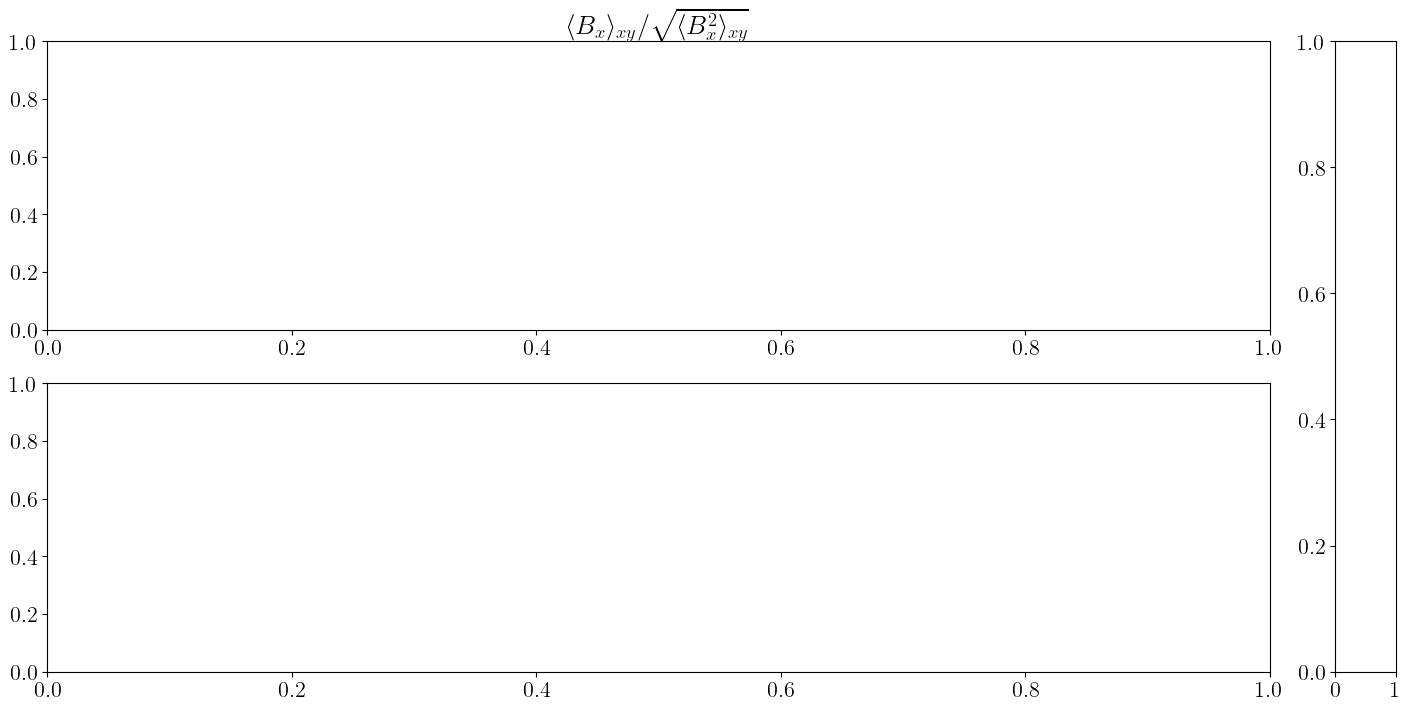

In [ ]:
gs_kw = dict(width_ratios=[2, 0.1], height_ratios=[1, 1])
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              gridspec_kw=gs_kw, figsize=(14,7),
                              layout="constrained")
# for k, ax in axd.items():
#     annotate_axes(ax, f'axd[{k!r}]', fontsize=14)
axd['upper left'].set_title(r'$\langle B_x \rangle _{xy}/\sqrt{\langle B_x^2 \rangle _{xy}}$')

    # print(k)
# fig.suptitle('plt.subplot_mosaic()')

NameError: name 'annotate_axes' is not defined

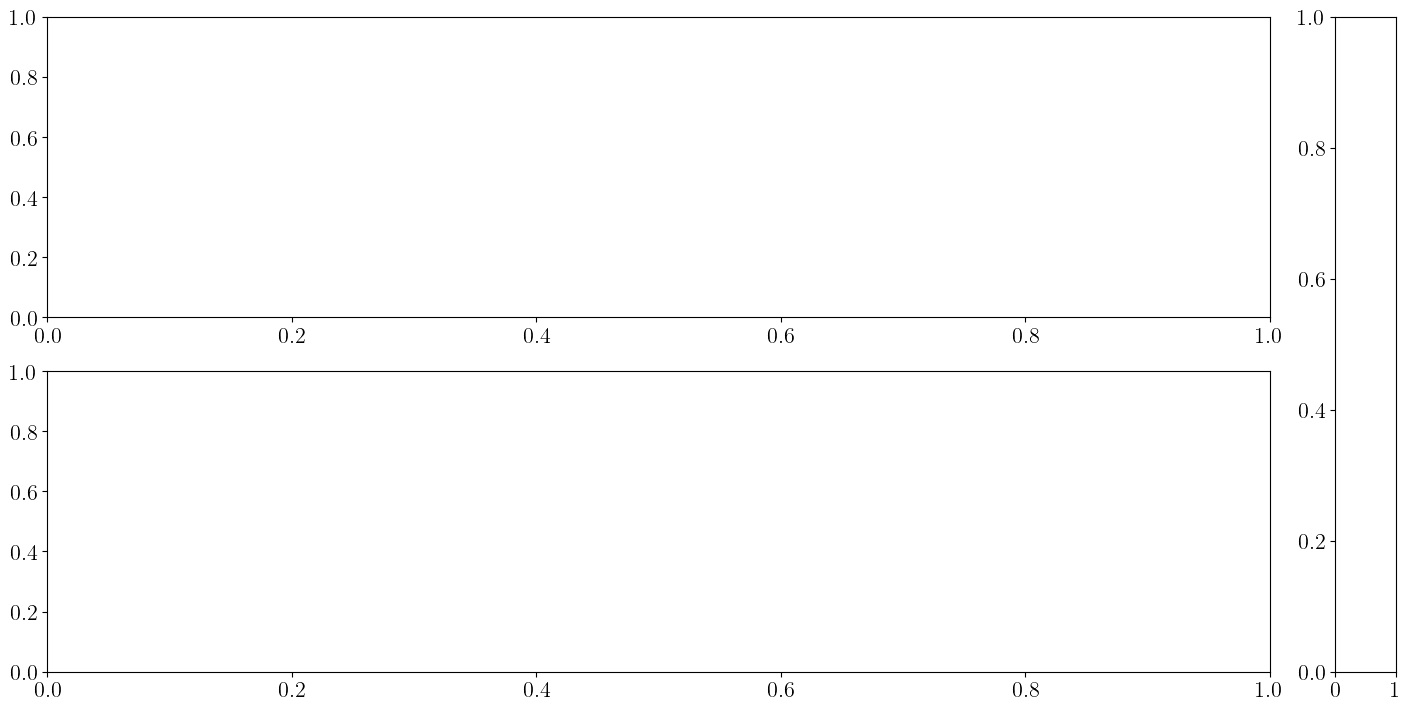

In [ ]:
gs_kw = dict(width_ratios=[2, 0.1], height_ratios=[1, 1])
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              gridspec_kw=gs_kw, figsize=(14,7),
                              layout="constrained")
for k, ax in axd.items():
    # annotate_axes(ax, f'axd[{k!r}]', fontsize=14)
    ax.set_title(r'$\langle B_x \rangle _{xy}/\sqrt{\langle B_x^2 \rangle _{xy}}$')

    print(k)
# fig.suptitle('plt.subplot_mosaic()')